#### A base de dados está restrita no período de 2000 à 2020

In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=4c33d2f64cff7889517e9e79adb9af8abd36968ccfc90aff31db7c99e0a74a96
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


#### Starting the spark session

In [2]:
from pyspark.sql import SparkSession

In [3]:
spark_session = SparkSession.builder\
                            .appName("Recomendation Spotfy")\
                            .getOrCreate()

spark_session

### Reading the dataset

In [4]:
from pyspark import SparkFiles

In [5]:
data_path = '/content/drive/MyDrive/Spark_Spotfy/dados_musicas.csv'

In [6]:
spark_session.sparkContext.addFile(data_path)

In [7]:
data = spark_session.read.csv(data_path, header=True, sep=';', inferSchema=True)

In [8]:
data.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [9]:
data.printSchema()

root
 |-- valence: double (nullable = true)
 |-- year: integer (nullable = true)
 |-- acousticness: double (nullable = true)
 |-- artists: string (nullable = true)
 |-- danceability: double (nullable = true)
 |-- duration_ms: integer (nullable = true)
 |-- energy: double (nullable = true)
 |-- explicit: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- instrumentalness: double (nullable = true)
 |-- key: integer (nullable = true)
 |-- liveness: double (nullable = true)
 |-- loudness: double (nullable = true)
 |-- mode: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- popularity: integer (nullable = true)
 |-- speechiness: double (nullable = true)
 |-- tempo: double (nullable = true)
 |-- artists_song: string (nullable = true)



In [10]:
data.count()

20311

In [11]:
len(data.columns)

19

In [12]:
import pyspark.sql.functions as f

In [13]:
data.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in data.columns]).show()


+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|valence|year|acousticness|artists|danceability|duration_ms|energy|explicit| id|instrumentalness|key|liveness|loudness|mode|name|popularity|speechiness|tempo|artists_song|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+
|      0|   0|           0|      0|           0|          0|     0|       0|  0|               0|  0|       0|       0|   0|   0|         0|          0|    0|           0|
+-------+----+------------+-------+------------+-----------+------+--------+---+----------------+---+--------+--------+----+----+----------+-----------+-----+------------+



In [14]:
print(sorted(data.select('year').distinct().collect()))

[Row(year=2000), Row(year=2001), Row(year=2002), Row(year=2003), Row(year=2004), Row(year=2005), Row(year=2006), Row(year=2007), Row(year=2008), Row(year=2009), Row(year=2010), Row(year=2011), Row(year=2012), Row(year=2013), Row(year=2014), Row(year=2015), Row(year=2016), Row(year=2017), Row(year=2018), Row(year=2019), Row(year=2020)]


#### Reading dataset 2, which reggards music-year relation

In [15]:
data_path_year = '/content/drive/MyDrive/Spark_Spotfy/dados_musicas_ano.csv'
spark_session.sparkContext.addFile(data_path_year)
data_year = spark_session.read.csv(data_path_year, header=True,inferSchema=True)
data_year.show()

+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|mode|year|      acousticness|       danceability|       duration_ms|             energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|            valence|         popularity|key|
+----+----+------------------+-------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+------------------+-------------------+-------------------+---+
|   1|1921|0.8868960000000005| 0.4185973333333336|260537.16666666663|0.23181513333333334|0.34487805886666656|            0.20571| -17.04866666666665|           0.073662|101.53149333333329|0.37932666666666665| 0.6533333333333333|  2|
|   1|1922|0.9385915492957748| 0.4820422535211267|165469.74647887325

In [16]:
data.select([f.count(f.when(f.isnull(c), 1)).alias(c) for c in data_year.columns]).show()


+----+----+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+
|mode|year|acousticness|danceability|duration_ms|energy|instrumentalness|liveness|loudness|speechiness|tempo|valence|popularity|key|
+----+----+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+
|   0|   0|           0|           0|          0|     0|               0|       0|       0|          0|    0|      0|         0|  0|
+----+----+------------+------------+-----------+------+----------------+--------+--------+-----------+-----+-------+----------+---+



In [17]:
data_year = data_year.filter('year >= 2000')
data_year.show()

+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|mode|year|       acousticness|      danceability|       duration_ms|            energy|   instrumentalness|           liveness|           loudness|        speechiness|             tempo|           valence|        popularity|key|
+----+----+-------------------+------------------+------------------+------------------+-------------------+-------------------+-------------------+-------------------+------------------+------------------+------------------+---+
|   1|2000|0.28932270051635994| 0.590918047034764| 242724.6426380368|0.6254128323108387|0.10116776879345596| 0.1976860429447853| -8.247765848670758|0.08920541922290394| 118.9993231083843|0.5594754601226991|  46.6840490797546|  7|
|   1|2001| 0.2868424748428934|0.5833178553615969|240307.79600997505|0.626985522

In [18]:
data_year.count()

21

In [19]:
len(data_year.columns)

14

In [20]:
import plotly.express as px

fig = px.line(data_year.toPandas(), x='year',y='loudness',markers=True,title='Loudness variation per year')
fig.show()

In [21]:
import plotly.graph_objects as go

fig = go.Figure()

temp = data_year.toPandas()

fig.add_trace(go.Scatter(x=temp['year'], y=temp['acousticness'], name='Acousticness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['valence'],
                    name='Valence'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['danceability'],
                    name='Danceability'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['energy'],
                    name='Energy'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['instrumentalness'],
                    name='Instrumentalness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['liveness'],
                    name='Liveness'))
fig.add_trace(go.Scatter(x=temp['year'], y=temp['speechiness'],
                    name='Speechiness'))

fig.show()


#### Correlation Matrix

In [22]:
fig = px.imshow(data_year.drop('mode').toPandas().corr(), text_auto=True)
fig.show()

In [23]:
data_gender_path = '/content/drive/MyDrive/Spark_Spotfy/dados_musicas_genero.csv'
spark_session.sparkContext.addFile(data_gender_path)

data_gender = spark_session.read.csv(data_gender_path,header=True,inferSchema=True)


In [24]:
data_gender.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+
|   1|21st century clas...| 0.9793333333333332|0.16288333333333335|160297.66666666663|0.07131666666666665|          0.60683367|             0.3616|-31.514333333333337| 0.04056666666666667|           75.3365|0.10378333333333334| 27.83333333333333| 

In [25]:
data_gender.count()

2973

In [26]:
data_gender.select('genres').distinct().count()

2973

In [27]:
len(data_gender.columns)

14

In [28]:
# Vectorizing the columns
from pyspark.ml.feature import VectorAssembler

In [29]:
data_gender.columns

['mode',
 'genres',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [30]:
X = data_gender.columns
X.remove('genres')

In [31]:
X

['mode',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'instrumentalness',
 'liveness',
 'loudness',
 'speechiness',
 'tempo',
 'valence',
 'popularity',
 'key']

In [32]:
data_gender_vector = VectorAssembler(inputCols=X, outputCol='features').transform(data_gender).select(['features','genres'])

In [33]:
data_gender_vector.show(truncate=False,n=5)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|features                                                                                                                                                                                                                   |genres                |
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------+
|[1.0,0.9793333333333332,0.16288333333333335,160297.66666666663,0.07131666666666665,0.60683367,0.3616,-31.514333333333337,0.04056666666666667,75.3365,0.10378333333333334,27.83333333333333,6.0]                            |21st century classical|
|[1.0,0.49478,0.2993

In [34]:
from pyspark.ml.feature import StandardScaler

In [35]:
scaler = StandardScaler(inputCol='features',outputCol='scaled_features')
scaler_model = scaler.fit(data_gender_vector)
data_gender_scaler = scaler_model.transform(data_gender_vector)

In [36]:
data_gender_scaler.show()

+--------------------+--------------------+--------------------+
|            features|              genres|     scaled_features|
+--------------------+--------------------+--------------------+
|[1.0,0.9793333333...|21st century clas...|[2.68174831000279...|
|[1.0,0.49478,0.29...|               432hz|[2.68174831000279...|
|[1.0,0.762,0.7120...|               8-bit|[2.68174831000279...|
|[1.0,0.6514170195...|                  []|[2.68174831000279...|
|[1.0,0.6765573049...|          a cappella|[2.68174831000279...|
|[1.0,0.45921,0.51...|            abstract|[2.68174831000279...|
|[1.0,0.3421466666...|      abstract beats|[2.68174831000279...|
|[1.0,0.2438540633...|    abstract hip hop|[2.68174831000279...|
|[0.0,0.3229999999...|           accordeon|[0.0,1.0101313736...|
|[1.0,0.446125,0.6...|           accordion|[2.68174831000279...|
|[0.0,0.0679505384...|          acid house|[0.0,0.2125045534...|
|[1.0,0.2569145079...|           acid rock|[2.68174831000279...|
|[1.0,0.00683,0.66...|   

In [37]:
from pyspark.ml.feature import PCA

In [38]:
pca = PCA(k=2, inputCol='scaled_features',outputCol='pca_features')
model_pca = pca.fit(data_gender_scaler)
data_gender_pca = model_pca.transform(data_gender_scaler)

In [39]:
data_gender_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

In [40]:
from pyspark.ml import Pipeline

In [41]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                        StandardScaler(inputCol='features',outputCol='scaled_features'),
                                PCA(k=2, inputCol='scaled_features',outputCol='pca_features')])

In [42]:
pca_pipeline_model = pca_pipeline.fit(data_gender)

In [43]:
data_gender_pca = pca_pipeline_model.transform(data_gender)

In [44]:
data_gender_pca.show()

+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|mode|              genres|       acousticness|       danceability|       duration_ms|             energy|    instrumentalness|           liveness|           loudness|         speechiness|             tempo|            valence|        popularity|key|            features|     scaled_features|        pca_features|
+----+--------------------+-------------------+-------------------+------------------+-------------------+--------------------+-------------------+-------------------+--------------------+------------------+-------------------+------------------+---+--------------------+--------------------+--------------------+
|   1|21st century clas...| 0.9793333333333332|0.162883333

In [45]:
data_gender_pca.select('pca_features').show(truncate=False)

+------------------------------------------+
|pca_features                              |
+------------------------------------------+
|[-2.5070953668885663,-0.43816913737698293]|
|[0.596967905663348,-4.981612052751353]    |
|[4.158460276223559,0.83665250810799]      |
|[2.3873448785122156,0.4877989015663361]   |
|[2.650121837167907,0.575681976882043]     |
|[1.4965091203367622,-1.8644183183717828]  |
|[3.9235207721573224,-0.28518350023528705] |
|[4.611011109831113,0.6783790472312338]    |
|[2.8376900630842288,0.57129937165805]     |
|[2.706690139892782,1.2593788079708255]    |
|[4.698331383924286,-1.2765569680619455]   |
|[3.375987496679866,-0.7560741064307498]   |
|[5.608998877066019,-1.042731164439324]    |
|[-0.2954946352117699,0.2763864586236268]  |
|[2.572559106287041,1.3169815431109746]    |
|[3.400822802049343,-0.5073029625781936]   |
|[4.366720316263417,0.33648270597710517]   |
|[2.7254698167723985,-0.5058604987046403]  |
|[4.958112358381603,-1.2627579957290722]   |
|[3.693495

In [46]:
from pyspark.ml.clustering import KMeans

In [47]:
SEED = 1222

In [48]:
kmeans = KMeans(featuresCol='pca_features', predictionCol='cluster_pca').setK(5).setSeed(SEED)

In [49]:
model_kmeans = kmeans.fit(data_gender_pca)

In [50]:
predictions_kmeans = model_kmeans.transform(data_gender_pca)

In [51]:
predictions_kmeans.select('pca_features','cluster_pca').show(truncate=False)

+------------------------------------------+-----------+
|pca_features                              |cluster_pca|
+------------------------------------------+-----------+
|[-2.5070953668885663,-0.43816913737698293]|3          |
|[0.596967905663348,-4.981612052751353]    |0          |
|[4.158460276223559,0.83665250810799]      |1          |
|[2.3873448785122156,0.4877989015663361]   |4          |
|[2.650121837167907,0.575681976882043]     |4          |
|[1.4965091203367622,-1.8644183183717828]  |0          |
|[3.9235207721573224,-0.28518350023528705] |1          |
|[4.611011109831113,0.6783790472312338]    |1          |
|[2.8376900630842288,0.57129937165805]     |4          |
|[2.706690139892782,1.2593788079708255]    |4          |
|[4.698331383924286,-1.2765569680619455]   |2          |
|[3.375987496679866,-0.7560741064307498]   |0          |
|[5.608998877066019,-1.042731164439324]    |2          |
|[-0.2954946352117699,0.2763864586236268]  |3          |
|[2.572559106287041,1.316981543

In [52]:
# Cluster
from pyspark.ml.functions import vector_to_array

In [53]:
pca_features_xy = predictions_kmeans.withColumn('x',vector_to_array('pca_features')[0])\
                              .withColumn('y',vector_to_array('pca_features')[1])\
                              .select(['x','y','cluster_pca','genres'])

In [54]:
pca_features_xy.show()

+-------------------+--------------------+-----------+--------------------+
|                  x|                   y|cluster_pca|              genres|
+-------------------+--------------------+-----------+--------------------+
|-2.5070953668885663|-0.43816913737698293|          3|21st century clas...|
|  0.596967905663348|  -4.981612052751353|          0|               432hz|
|  4.158460276223559|    0.83665250810799|          1|               8-bit|
| 2.3873448785122156|  0.4877989015663361|          4|                  []|
|  2.650121837167907|   0.575681976882043|          4|          a cappella|
| 1.4965091203367622| -1.8644183183717828|          0|            abstract|
| 3.9235207721573224|-0.28518350023528705|          1|      abstract beats|
|  4.611011109831113|  0.6783790472312338|          1|    abstract hip hop|
| 2.8376900630842288|    0.57129937165805|          4|           accordeon|
|  2.706690139892782|  1.2593788079708255|          4|           accordion|
|  4.6983313

In [55]:
fig = px.scatter(pca_features_xy.toPandas(),x='x',y='y', color='cluster_pca',hover_data=['x','y','genres'])
fig.show()

In [56]:
pca_pipeline_model.stages[2].explainedVariance

DenseVector([0.2975, 0.1212])

#### Aply PCA in the music data

In [57]:
data.show()

+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|           valence|year|acousticness|       artists|      danceability|duration_ms|            energy|explicit|                  id|    instrumentalness|key|liveness|           loudness|mode|                name|popularity|speechiness|             tempo|        artists_song|
+------------------+----+------------+--------------+------------------+-----------+------------------+--------+--------------------+--------------------+---+--------+-------------------+----+--------------------+----------+-----------+------------------+--------------------+
|             0.285|2000|     0.00239|      Coldplay|             0.429|     266773|0.6609999999999999|       0|3AJwUDP919kvQ9Qco...|             1.21E-4| 11|   0.234|  

In [59]:
X = data.columns
X.remove('artists')
X.remove('id')
X.remove('name')
X.remove('artists_song')
X

['valence',
 'year',
 'acousticness',
 'danceability',
 'duration_ms',
 'energy',
 'explicit',
 'instrumentalness',
 'key',
 'liveness',
 'loudness',
 'mode',
 'popularity',
 'speechiness',
 'tempo']

In [61]:
data_encoded_vector = VectorAssembler(inputCols=X,outputCol='features').transform(data)

In [62]:
data_encoded_vector.select('features').show(truncate=False,n=5)

+-------------------------------------------------------------------------------------------------------------------------+
|features                                                                                                                 |
+-------------------------------------------------------------------------------------------------------------------------+
|[0.285,2000.0,0.00239,0.429,266773.0,0.6609999999999999,0.0,1.21E-4,11.0,0.234,-7.227,1.0,84.0,0.0281,173.372]           |
|[0.613,2000.0,0.143,0.843,270507.0,0.8059999999999999,1.0,0.0,4.0,0.0771,-5.9460000000000015,0.0,80.0,0.269,94.948]      |
|[0.4,2000.0,0.00958,0.556,216880.0,0.8640000000000001,0.0,0.0,3.0,0.209,-5.87,0.0,84.0,0.0584,105.143]                   |
|[0.5429999999999999,2000.0,0.00664,0.545,233933.0,0.865,0.0,1.1E-5,11.0,0.168,-5.7079999999999975,0.0,78.0,0.0286,99.009]|
|[0.76,2000.0,0.0302,0.949,284200.0,0.6609999999999999,1.0,0.0,5.0,0.0454,-4.244,0.0,80.0,0.0572,104.504]                 |
+-------

In [63]:
scaler = StandardScaler(inputCol='features',outputCol='features_scaled')
model_scaler = scaler.fit(data_encoded_vector)
data_music_scaler = model_scaler.transform(data_encoded_vector)

In [64]:
data_music_scaler.select('features_scaled').show(truncate=False, n=5)

+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|features_scaled                                                                                                                                                                                                                                                               |
+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|[1.156596679221045,329.8170613984441,0.008403188822334736,2.5040545743834373,3.7858811737298526,2.980511298201045,0.0,6.070790766862789E-4,3.0696424994844875,1.4832857988766257,-1.

In [65]:
k = len(X)
k

15

In [67]:
pca = PCA(k=k, inputCol='features_scaled',outputCol='pca_features')
model_pca = pca.fit(data_music_scaler)
data_music_pca = model_pca.transform(data_music_scaler)

In [69]:
sum(model_pca.explainedVariance) * 100

100.00000000000003

In [70]:
list_values = [sum(model_pca.explainedVariance[0:i+1]) for i in range(k)]
list_values

[0.21297354127107349,
 0.3459774162295507,
 0.43989805678254446,
 0.5267820578269103,
 0.6001038103117929,
 0.666571951365239,
 0.7282174213581728,
 0.7845103843321023,
 0.8350002357002614,
 0.8812446547406769,
 0.9151737562703048,
 0.9435370133056039,
 0.9699018569070161,
 0.9900947792885582,
 1.0000000000000002]

In [71]:
import numpy as np

In [73]:
k = sum(np.array(list_values) <0.7)
k

6

In [74]:
pca = PCA(k=k, inputCol='features_scaled',outputCol='pca_features')
model_pca = pca.fit(data_music_scaler)
data_music_pca_final = model_pca.transform(data_music_scaler)

In [76]:
data_music_pca_final.select('pca_features').show(truncate=False,n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [77]:
sum(model_pca.explainedVariance) * 100

66.6571951365239

### Building K-Means cluster

In [78]:
pca_pipeline = Pipeline(stages=[VectorAssembler(inputCols=X, outputCol='features'),
                                StandardScaler(inputCol='features', outputCol='features_scaled'),
                                PCA(k=6, inputCol='features_scaled', outputCol='pca_features')])


In [79]:
model_pca_pipeline = pca_pipeline.fit(data)

In [80]:
projection = model_pca_pipeline.transform(data)

In [81]:
projection.select('pca_features').show(truncate=False,n=5)

+----------------------------------------------------------------------------------------------------------------------+
|pca_features                                                                                                          |
+----------------------------------------------------------------------------------------------------------------------+
|[-34.71004464775702,-165.3684878490617,-11.163498729833675,-139.1137428085442,14.152192300931317,-6.254422223810444]  |
|[-36.49885762774904,-167.85185045616547,-10.729023248907904,-135.90435265671286,13.38840189058717,-3.972980727830917] |
|[-35.46030091694054,-165.99633344577876,-11.361290348241944,-138.24276881246985,13.866654919305718,-4.342675920458773]|
|[-35.56301325520582,-165.59515096480598,-11.46022600703173,-137.52095740570027,15.568542803922659,-4.542073725584329] |
|[-36.54556974907565,-167.37512505802474,-11.881276527236897,-136.27798590243967,14.056847990344485,-3.583390145779214]|
+-------------------------------

In [82]:
kmeans = KMeans(k=50, featuresCol='pca_features',predictionCol='cluster_pca',seed=SEED)

In [83]:
model_kmeans = kmeans.fit(projection)

In [84]:
projection_kmeans = model_kmeans.transform(projection)

In [85]:
projection_kmeans.select(['pca_features','cluster_pca']).show()

+--------------------+-----------+
|        pca_features|cluster_pca|
+--------------------+-----------+
|[-34.710044647757...|         27|
|[-36.498857627749...|         48|
|[-35.460300916940...|         24|
|[-35.563013255205...|         24|
|[-36.545569749075...|         48|
|[-36.713222290262...|         48|
|[-36.013246178822...|         48|
|[-36.542687712104...|         33|
|[-36.425249009784...|         17|
|[-35.872074915770...|         23|
|[-31.639065936568...|          8|
|[-35.661446890546...|         23|
|[-35.574542234850...|          9|
|[-36.022399748656...|         25|
|[-34.336941950985...|         35|
|[-35.096906055142...|         26|
|[-35.202423054032...|         16|
|[-34.942948671026...|         16|
|[-36.617404517517...|         31|
|[-34.296973387410...|         22|
+--------------------+-----------+
only showing top 20 rows



In [86]:
projection_kmeans = projection_kmeans.withColumn('x',vector_to_array('pca_features')[0])\
                                                .withColumn('y',vector_to_array('pca_features')[1])

In [87]:
projection_kmeans.select(['x','y','cluster_pca','artists_song']).show()

+-------------------+-------------------+-----------+--------------------+
|                  x|                  y|cluster_pca|        artists_song|
+-------------------+-------------------+-----------+--------------------+
| -34.71004464775702| -165.3684878490617|         27|   Coldplay - Yellow|
| -36.49885762774904|-167.85185045616547|         48|OutKast - Ms. Jac...|
| -35.46030091694054|-165.99633344577876|         24|Linkin Park - In ...|
| -35.56301325520582|-165.59515096480598|         24|3 Doors Down - Kr...|
| -36.54556974907565|-167.37512505802474|         48|Eminem - The Real...|
|  -36.7132222902623|  -166.482084830997|         48|Disturbed - Down ...|
| -36.01324617882219|-166.63514920955333|         48| Nelly - Ride Wit Me|
| -36.54268771210487| -166.9792823483323|         33|       Eminem - Stan|
|  -36.4252490097843|-165.10535006330755|         17|*NSYNC - Bye Bye Bye|
| -35.87207491577071| -166.0309883824791|         23|Britney Spears - ...|
|-31.639065936568734|-166

### Cluster Plot

In [88]:
fig = px.scatter(projection_kmeans.toPandas(),x='x',y='y',color='cluster_pca',hover_data=['artists_song'])
fig.show()

In [89]:
music_name = 'Juice WRLD - Lucid Dreams'

In [93]:
cluster = projection_kmeans.filter(projection_kmeans.artists_song == music_name).select('cluster_pca').collect()[0][0]
cluster

5

In [94]:
recommended_musics = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                              .select('artists_song','id','pca_features')

recommended_musics.show()

+--------------------+--------------------+--------------------+
|        artists_song|                  id|        pca_features|
+--------------------+--------------------+--------------------+
|   Drake - Headlines|6LxSe8YmdPxy095Ux...|[-35.122348496276...|
|Chief Keef - Love...|4IowQDUOzUvNtp72H...|[-34.992849725565...|
|Chief Keef - Hate...|3SuzCeGoNOWmbWOoD...|[-35.256685716115...|
|Rihanna - Loveeee...|3DZQ6mzUkAdHqZWzq...|[-34.769342297836...|
|J. Cole - No Role...|62vpWI1CHwFy7tMIc...|[-35.451127583278...|
|Ty Dolla $ign - O...|7t2bFihaDvhIrd2gn...|[-34.645998912335...|
|G-Eazy - I Mean I...|6jmTHeoWvBaSrwWtt...|[-35.338480225683...|
|J. Cole - Apparently|1HNs07uZxZniPNmni...|[-34.669739536743...|
|ScHoolboy Q - Studio|29gsi1zZrZxdStACm...|[-35.635469739004...|
|K CAMP - Comfortable|2BqQQXuBOuhaWeUP7...|[-34.394802166828...|
|Night Lovell - Da...|7Cye3UbCA6UNuDykd...|[-34.113837100992...|
|Kid Ink - Show Me...|4q6dqyGM25sKFU8nY...|[-35.470954174798...|
|The Weeknd - The ...|7fB

In [95]:
music_components = recommended_musics.filter(recommended_musics.artists_song == music_name)\
                                            .select('pca_features').collect()[0][0]
music_components

DenseVector([-34.9858, -169.566, -9.7177, -138.2985, 13.716, -4.4985])

In [97]:
from scipy.spatial.distance import euclidean
from pyspark.sql.types import FloatType

In [103]:
def euclidean_distance(value):
  return euclidean(music_components,value)

udf_euclidean_distance = f.udf(euclidean_distance,FloatType())

recommended_musics_dist = recommended_musics.withColumn('Dist',udf_euclidean_distance('pca_features'))

#recommended_musics_dist.show()

recommended= spark_session.createDataFrame(recommended_musics_dist.sort('Dist').take(10)).select(['artists_song','id','Dist'])
recommended.show()

+--------------------+--------------------+------------------+
|        artists_song|                  id|              Dist|
+--------------------+--------------------+------------------+
|Juice WRLD - Luci...|285pBltuF7vW8TeWk...|               0.0|
|Summer Walker - G...|14SaZBTjxlorHJQxX...|1.1275835037231445|
|The Kid LAROI - M...|4YfNO7sdbAKlkGpIF...| 1.154309868812561|
|      Lil Tjay - F.N|0RLLvYBopDwooCyvn...|1.2385871410369873|
|Lil Baby - Emotio...|7ge7BHazYbVKi8qyZ...|1.2902648448944092|
|Chris Brown - No ...|6XHVuErjQ4XNm6nDP...|1.2926950454711914|
|Young Thug - The ...|7DcvwMAiqKJQD1rrd...|1.3136802911758423|
|Drake - Pain 1993...|6Kj17Afjo1OKJYpf5...| 1.375988245010376|
| Rihanna - Needed Me|4pAl7FkDMNBsjykPX...|1.4033225774765015|
|Travis Scott - HI...|3eekarcy7kvN4yt5Z...|1.4453521966934204|
+--------------------+--------------------+------------------+



In [104]:
def reco(music_name):
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == music_name).select('cluster_pca').collect()[0][0]
  recommended_musics = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                              .select('artists_song','id','pca_features')
  music_components = recommended_musics.filter(recommended_musics.artists_song == music_name)\
                                            .select('pca_features').collect()[0][0]
  def euclidean_distance(value):
    return euclidean(music_components,value)

  udf_euclidean_distance = f.udf(euclidean_distance,FloatType())

  recommended_musics_dist = recommended_musics.withColumn('Dist',udf_euclidean_distance('pca_features'))

  recommended= spark_session.createDataFrame(recommended_musics_dist.sort('Dist').take(10)).select(['artists_song','id','Dist'])

  recommended.select('artists_song').show(truncate=False)



In [105]:
reco('Juice WRLD - Lucid Dreams')

+------------------------------------------------------+
|artists_song                                          |
+------------------------------------------------------+
|Juice WRLD - Lucid Dreams                             |
|Summer Walker - Girls Need Love (with Drake) - Remix  |
|The Kid LAROI - MAYBE                                 |
|Lil Tjay - F.N                                        |
|Lil Baby - Emotionally Scarred                        |
|Chris Brown - No Guidance (feat. Drake)               |
|Young Thug - The London (feat. J. Cole & Travis Scott)|
|Drake - Pain 1993 (with Playboi Carti)                |
|Rihanna - Needed Me                                   |
|Travis Scott - HIGHEST IN THE ROOM                    |
+------------------------------------------------------+



In [106]:
!pip install spotipy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 5.8 MB/s eta 0:00:00


In [107]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth, SpotifyClientCredentials


In [108]:
scope = "user-library-read playlist-modify-private"

OAuth = SpotifyOAuth(
        scope=scope,
        redirect_uri='http://localhost:5000/callback',
        client_id = '79ac62a9f4b048b2a4f10de545bb1d53',
        client_secret = 'd3a5ceee80874394b003e704dff50f81')


In [109]:
client_credentials_manager = SpotifyClientCredentials(client_id = '79ac62a9f4b048b2a4f10de545bb1d53',
                                                      client_secret = 'd3a5ceee80874394b003e704dff50f81')

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)


In [110]:
id = projection_kmeans.filter(projection_kmeans.artists_song == music_name).select('id').collect()[0][0]
id


'285pBltuF7vW8TeWk8hdRR'

In [ ]:
sp.track(id)


In [116]:
def reco(music_name):
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == music_name).select('cluster_pca').collect()[0][0]
  recommended_musics = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                              .select('artists_song','id','pca_features')
  music_components = recommended_musics.filter(recommended_musics.artists_song == music_name)\
                                            .select('pca_features').collect()[0][0]
  def euclidean_distance(value):
    return euclidean(music_components,value)

  udf_euclidean_distance = f.udf(euclidean_distance,FloatType())

  recommended_musics_dist = recommended_musics.withColumn('Dist',udf_euclidean_distance('pca_features'))

  recommended= spark_session.createDataFrame(recommended_musics_dist.sort('Dist').take(10)).select(['artists_song','id','Dist'])

  recommended.select('artists_song').show(truncate=False)
  # API data
  playlist_id = recommended.select('id').collect()

  playlist_track = []

  for i in playlist_id:
    playlist_track.append(sp.track(id))

  return len(playlist_track)

In [117]:
reco('Juice WRLD - Lucid Dreams')

+------------------------------------------------------+
|artists_song                                          |
+------------------------------------------------------+
|Juice WRLD - Lucid Dreams                             |
|Summer Walker - Girls Need Love (with Drake) - Remix  |
|The Kid LAROI - MAYBE                                 |
|Lil Tjay - F.N                                        |
|Lil Baby - Emotionally Scarred                        |
|Chris Brown - No Guidance (feat. Drake)               |
|Young Thug - The London (feat. J. Cole & Travis Scott)|
|Drake - Pain 1993 (with Playboi Carti)                |
|Rihanna - Needed Me                                   |
|Travis Scott - HIGHEST IN THE ROOM                    |
+------------------------------------------------------+



10

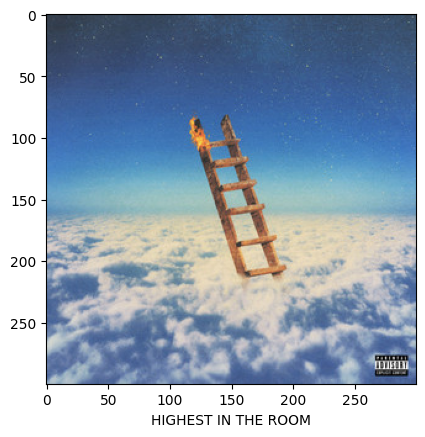

In [121]:
import matplotlib.pyplot as plt
from skimage import io

music_name = 'Travis Scott - HIGHEST IN THE ROOM'

id = projection_kmeans\
          .filter(projection_kmeans.artists_song == music_name)\
          .select('id').collect()[0][0]

track = sp.track(id)

url = track["album"]["images"][1]["url"]
name = track["name"]

image = io.imread(url)
plt.imshow(image)
plt.xlabel(name, fontsize = 10)
plt.show()


In [122]:
import matplotlib.pyplot as plt
from skimage import io

def visualize_songs(name,url):

    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
    plt.show()

In [123]:
playlist_id = recommended.select('id').collect()

name = []
url = []
for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])


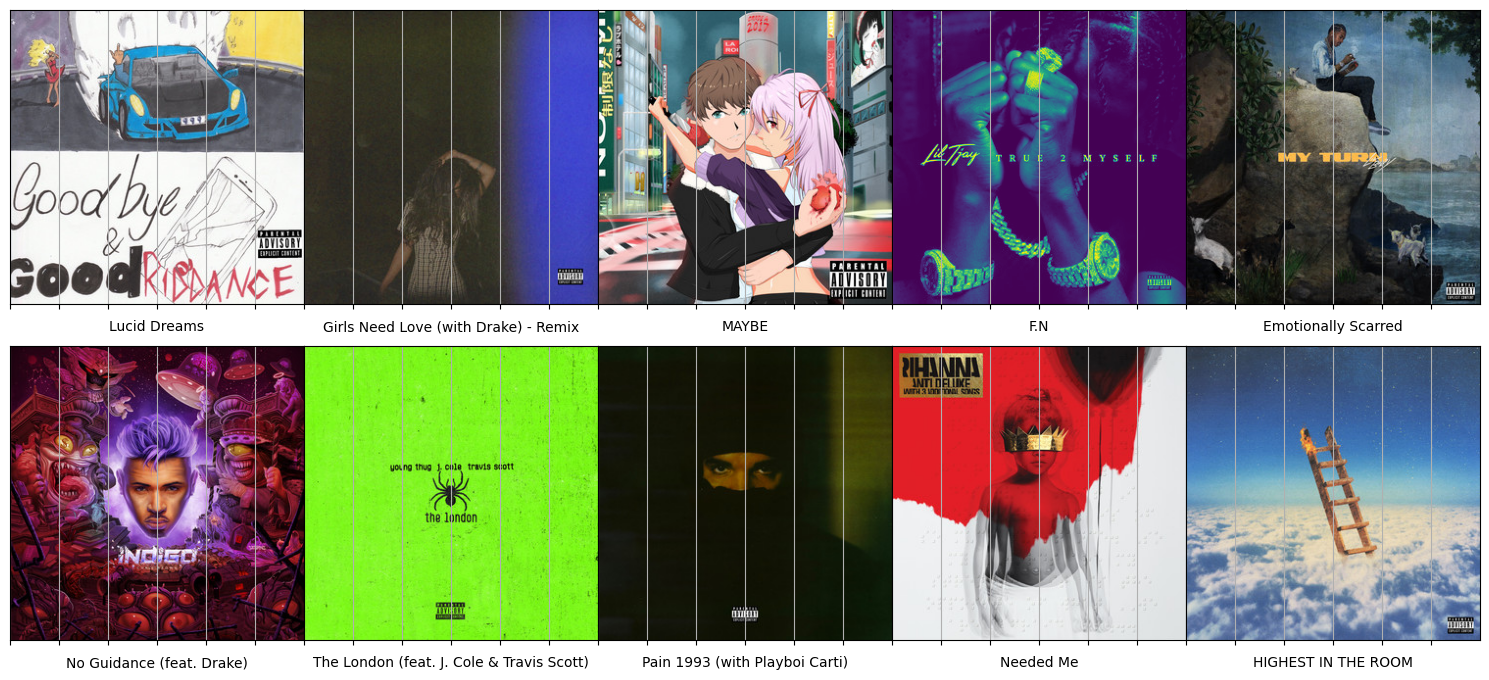

In [124]:
visualize_songs(name,url)


In [172]:
def reco(music_name):
  cluster = projection_kmeans.filter(projection_kmeans.artists_song == music_name).select('cluster_pca').collect()[0][0]
  recommended_musics = projection_kmeans.filter(projection_kmeans.cluster_pca == cluster)\
                                              .select('artists_song','id','pca_features')
  music_components = recommended_musics.filter(recommended_musics.artists_song == music_name)\
                                            .select('pca_features').collect()[0][0]
  def euclidean_distance(value):
    return euclidean(music_components,value)

  udf_euclidean_distance = f.udf(euclidean_distance,FloatType())

  recommended_musics_dist = recommended_musics.withColumn('Dist',udf_euclidean_distance('pca_features'))

  recommended= spark_session.createDataFrame(recommended_musics_dist.sort('Dist').take(10)).select(['artists_song','id','Dist'])

  #recommended.select('artists_song').show(truncate=False)
  # API data
  playlist_id = recommended.select('id').collect()
  name = []
  url = []
  for i in playlist_id:
    track = sp.track(i[0])
    url.append(track["album"]["images"][1]["url"])
    name.append(track["name"])
  # Show songs
    plt.figure(figsize=(15,10))
    columns = 5
    for i, u in enumerate(url):
        ax = plt.subplot(len(url) // columns + 1, columns, i + 1)
        image = io.imread(u)
        plt.imshow(image)
        ax.get_yaxis().set_visible(False)
        #ax.remove()
        plt.xticks(color = 'w', fontsize = 0.1)
        plt.yticks(color = 'w', fontsize = 0.1)
        plt.xlabel(name[i], fontsize = 10)
        plt.tight_layout(h_pad=0.7, w_pad=0.1)
        plt.subplots_adjust(wspace=None, hspace=None)
        plt.grid(visible=None)
        #plt.axis('off')
    plt.show()


In [173]:
reco('Rihanna - Needed Me')

Output hidden; open in https://colab.research.google.com to view.